# <center> Baby Destination Assignment Project-3 </center>

Analysis: Data given on blog posts we have done along with categories, Life Stage,
word count, Reach, link clicks, avg time spent, and read more clicked.
1. Calculate rate of read more click in for all posts.
2. Perform data analysis to show how to optimize the rate of read more form above #1.
3. Comment on your findings.

<h1> Table of Content </h1>

<ol>
        <li><a href="#ref1">Import Required libraries</a></li>
        <li><a href="#ref2">Acquiring the Data</a></li>
        <li><a href="#ref3">Preprocessing</a></li>
        <li><a href="#ref4">Calculate rate of read more click in for all posts.</a></li>
        <li><a href="#ref5">Perform data analysis to show how to optimize the rate of read more form above #1.</a></li>
        <li><a href="#ref6">Comment on your findings.</a></li>

</ol>

<a id="ref1"></a>
## 1. Import Required Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

<a id="ref2"></a>
## 2. Acquiring the Data

Lets import the Analysis sheet from the excel file

In [2]:
df1=pd.read_excel(r"C:\Users\user\Downloads\Reporting Assignment.xlsx",sheet_name="Analysis")#,skiprows=1)

#### 2.1 Read first 5 rows from the dataset

In [3]:
df1.head()

,Life Stage,Life Stage.1,Categories,Post Name,Word Count,Reach,Link Clicks,Avg time in secs,GA read more clicked on post
0,2y-4y|4y+,NaN,Parenting,How to Teach Your Boys to Become Great Men,1166.0,35953,1023,62,570
1,0m-6m|7m-12m,NaN,Health,Home Remedies to Treat Heat Rash in Babies,614.0,30299,532,86,293
2,-9,NaN,Pregnant,Is It Safe To Get Waxed During Pregnancy?,599.0,38459,978,56,528
3,4y+,NaN,Parenting,Parenting Adult Children| How to keep the Bond...,1111.0,21302,372,81,180
4,7m-12m|1y-2y|2y-4y|4y+,NaN,Activities,Top 10 Kids’ Play Areas in Delhi,1220.0,12453,423,79,306


#### 2.2 Check the size of the dataset

In [4]:
df1.shape

(51, 9)

<a id="ref3"></a>
## 3. Preprocessing

#### 3.1 Lets rename the column names as some of the column names contain space

In [5]:
df1.columns=["Life_Stage","Life_Stage1","Categories","Post_Name","Word_Count","Reach","Link_Clicks","AvgTime_Sec","Read_More_Clicked"]
df1.head()

,Life_Stage,Life_Stage1,Categories,Post_Name,Word_Count,Reach,Link_Clicks,AvgTime_Sec,Read_More_Clicked
0,2y-4y|4y+,NaN,Parenting,How to Teach Your Boys to Become Great Men,1166.0,35953,1023,62,570
1,0m-6m|7m-12m,NaN,Health,Home Remedies to Treat Heat Rash in Babies,614.0,30299,532,86,293
2,-9,NaN,Pregnant,Is It Safe To Get Waxed During Pregnancy?,599.0,38459,978,56,528
3,4y+,NaN,Parenting,Parenting Adult Children| How to keep the Bond...,1111.0,21302,372,81,180
4,7m-12m|1y-2y|2y-4y|4y+,NaN,Activities,Top 10 Kids’ Play Areas in Delhi,1220.0,12453,423,79,306


#### 3.2 Lets sort the vakues by "read more click on post", just to check which post_name is clicked mostly

In [6]:
df1=df1.sort_values(by="Read_More_Clicked",ascending= False )
df1.head()

,Life_Stage,Life_Stage1,Categories,Post_Name,Word_Count,Reach,Link_Clicks,AvgTime_Sec,Read_More_Clicked
11,-9,NaN,Pregnant,Effective Ways to Prevent Post Pregnancy Breas...,834.0,66805,5793,74,3627
12,0m-6m|7m-12m|1y-2y|2y-4y|4y+,NaN,Health and Hygiene,Worms in children| All that you need to know,589.0,52798,3860,64,2478
31,-9,NaN,Lactation,What to Expect from your Periods after Pregnancy,715.0,79564,4496,69,1942
6,0m-6m|7m-12m|1y-2y|2y-4y|4y+,NaN,celebrity,5 Bollywood Stars who had kids by Surrogacy,538.0,47408,2367,70,1333
14,1y-2y| 2y-4y| 4y+,NaN,Development,7 Simple Ways to Increase your Child’s Height,716.0,32423,1574,56,1324


<a id="ref4"></a>
# 4. Calculate rate of read more click in for all posts.

#### 4.1 Lets check the counts of each categories

In [7]:
df1['Categories'].value_counts().to_frame()

,Categories
Parenting,9
Pregnant,8
Babycare,7
Lactation,6
Nutrition,6
Development,5
Health and Hygiene,4
celebrity,3
Health & Hygiene,1
Health,1


#### 4.2 Create Pivot table to find the rate of "read more click" in for all posts, Also add the "word count", "reach", "avg time", "link clicks" in values in order to compare each value w.r.t read_more_clicked

In [8]:
df2 = pd.pivot_table(df1, index=('Post_Name',"Categories","Life_Stage"), values = ("Word_Count","Reach","Link_Clicks","AvgTime_Sec",'Read_More_Clicked'), aggfunc=sum).apply(lambda x:100 * x / float(x.sum())).round(2).fillna(0)
df2

,,,AvgTime_Sec,Link_Clicks,Reach,Read_More_Clicked,Word_Count
Post_Name,Categories,Life_Stage,,,,,
10 Amazing Things that Babies do inside the Womb,Pregnant,-9,1.92,2.50,2.39,2.62,2.53
10 Best Learning Toys For Toddlers,Development,1y-2y,1.90,2.14,1.82,0.15,3.51
10 Proven Ways to Develop a Great Relationship with your Children,Parenting,0m-6m|7m-12m|1y-2y|2y-4y|4y+,1.44,0.75,1.27,0.90,2.64
10 Quick Breakfast Ideas for Your Fussy Preschooler,Nutrition,2y-4y,1.59,1.64,1.40,2.41,2.71
10 Things Pediatricians wish Women Knew during Pregnancy,Pregnant,-9,1.54,0.54,1.57,1.43,2.85
10 Useful Tips While Breastfeeding Twins,Lactation,0m-6m| 7m-12m| 1y-2y,1.69,0.61,1.38,0.21,1.67
10 Ways to Teach your Child to be Responsible,Parenting,2y-4y| 4y+,2.73,0.40,0.60,0.52,1.38
12 Essential Habits that Parents must Teach their Kids,Parenting,0m-6m|7m-12m|1y-2y|2y-4y|4y+,2.50,2.99,3.07,3.84,2.80
5 Bollywood Stars who had kids by Surrogacy,celebrity,0m-6m|7m-12m|1y-2y|2y-4y|4y+,1.77,4.52,3.29,4.59,1.37


#### 4.3 To check the hightest rate of "read more clicked" againt all post, lets sort the values in descending order by "read more clicked"

In [9]:
df2_Readmore=df2.sort_values(by='Read_More_Clicked',ascending =False).head()  # top 5
df2_Readmore

,,,AvgTime_Sec,Link_Clicks,Reach,Read_More_Clicked,Word_Count
Post_Name,Categories,Life_Stage,,,,,
Effective Ways to Prevent Post Pregnancy Breast Sagging,Pregnant,-9,1.87,11.05,4.64,12.48,2.13
Worms in children| All that you need to know,Health and Hygiene,0m-6m|7m-12m|1y-2y|2y-4y|4y+,1.62,7.36,3.66,8.53,1.51
What to Expect from your Periods after Pregnancy,Lactation,-9,1.74,8.58,5.52,6.68,1.83
5 Bollywood Stars who had kids by Surrogacy,celebrity,0m-6m|7m-12m|1y-2y|2y-4y|4y+,1.77,4.52,3.29,4.59,1.37
7 Simple Ways to Increase your Child’s Height,Development,1y-2y| 2y-4y| 4y+,1.42,3.00,2.25,4.56,1.83


#### 4.4 Conclusion: 

From the above, We see that "read more clicked" has the highest value which is 12.48% on post name "Effective Ways to Prevent Post Pregnancy Breast Sagging" and categories "Pregnant" 

<a id="ref5"></a>
# 5. Perform data analysis to show how to optimize the rate of read more form above (improve)

#### 5.1 Lets sort the values by Avg Time in descending order, to check which post and category has the highest avg time in sec.

In [10]:
df2_AvgTime_Sec=df2.sort_values(by='AvgTime_Sec',ascending =False).head()
df2_AvgTime_Sec

,,,AvgTime_Sec,Link_Clicks,Reach,Read_More_Clicked,Word_Count
Post_Name,Categories,Life_Stage,,,,,
How to Cure Diarrhea in Babies,Health and Hygiene,0m-6m| 7m-12m| 1y-2y,3.36,0.47,0.62,0.49,1.55
Do’s and Don’ts in case of Newborn Jaundice,Babycare,0m-6m,3.31,0.46,0.71,0.39,1.66
Best ways to encourage your baby to crawl,Development,7m-12m,2.81,0.68,0.85,0.68,2.60
Is it ok to give Honey to Babies?,Babycare,0m-6m|7m-12m|1y-2y|2y-4y|4y+,2.78,1.91,2.02,1.46,1.52
10 Ways to Teach your Child to be Responsible,Parenting,2y-4y| 4y+,2.73,0.40,0.60,0.52,1.38


#### Conclusion: 

From above, We see that "AvgTime_Sec" has the highest value which is 3.36% on post name "How to Cure Diarrhea in Babies" and categories "Health and Hygiene" 

#### 5.2 Lets sort the values by 'Link_Clicks' in descending order, to check which post and category has the highest avg time in sec.

In [11]:
df2_Linkclicks=df2.sort_values(by='Link_Clicks',ascending =False).head()
df2_Linkclicks

,,,AvgTime_Sec,Link_Clicks,Reach,Read_More_Clicked,Word_Count
Post_Name,Categories,Life_Stage,,,,,
Effective Ways to Prevent Post Pregnancy Breast Sagging,Pregnant,-9,1.87,11.05,4.64,12.48,2.13
What to Expect from your Periods after Pregnancy,Lactation,-9,1.74,8.58,5.52,6.68,1.83
Worms in children| All that you need to know,Health and Hygiene,0m-6m|7m-12m|1y-2y|2y-4y|4y+,1.62,7.36,3.66,8.53,1.51
Celina Jaitley due with Twins Again,celebrity,-9|0m-6m|7m-12m|1y-2y|2y-4y|4y+,1.01,4.59,4.32,4.07,0.00
5 Bollywood Stars who had kids by Surrogacy,celebrity,0m-6m|7m-12m|1y-2y|2y-4y|4y+,1.77,4.52,3.29,4.59,1.37


#### Conclusion: 

We see that 'Link_Clicks' has the highest value which is 11.05% on post name "Effective Ways to Prevent Post Pregnancy Breast Sagging" and categories "Pregnant" 

#### 5.3 Lets sort the values by 'Reach' in descending order, to check which post and category has the highest avg time in sec.

In [12]:
df2_Reach=df2.sort_values(by='Reach',ascending =False).head()
df2_Reach

,,,AvgTime_Sec,Link_Clicks,Reach,Read_More_Clicked,Word_Count
Post_Name,Categories,Life_Stage,,,,,
What to Expect from your Periods after Pregnancy,Lactation,-9,1.74,8.58,5.52,6.68,1.83
Effective Ways to Prevent Post Pregnancy Breast Sagging,Pregnant,-9,1.87,11.05,4.64,12.48,2.13
Celina Jaitley due with Twins Again,celebrity,-9|0m-6m|7m-12m|1y-2y|2y-4y|4y+,1.01,4.59,4.32,4.07,0.00
Most common Foot Problems during Pregnancy & how to deal with them,Pregnant,-9,1.09,0.67,4.13,1.17,2.56
Worms in children| All that you need to know,Health and Hygiene,0m-6m|7m-12m|1y-2y|2y-4y|4y+,1.62,7.36,3.66,8.53,1.51


#### Conclusion: 

We see that "Reach" has the highest value which is 5.52%  on post name "What to Expect from your Periods after Pregnancy" and categories "Lactation" 

#### 5.4 Lets sort the values by 'Word_Count' in descending order, to check which post and category has the highest avg time in sec.

In [13]:
df2_Wordcount=df2.sort_values(by='Word_Count',ascending =False).head()
df2_Wordcount

,,,AvgTime_Sec,Link_Clicks,Reach,Read_More_Clicked,Word_Count
Post_Name,Categories,Life_Stage,,,,,
10 Best Learning Toys For Toddlers,Development,1y-2y,1.90,2.14,1.82,0.15,3.51
Top 10 Kids’ Play Areas in Delhi,Activities,7m-12m|1y-2y|2y-4y|4y+,2.00,0.81,0.86,1.05,3.12
How to Teach Your Boys to Become Great Men,Parenting,2y-4y|4y+,1.57,1.95,2.49,1.96,2.98
10 Things Pediatricians wish Women Knew during Pregnancy,Pregnant,-9,1.54,0.54,1.57,1.43,2.85
Parenting Adult Children| How to keep the Bond Intact,Parenting,4y+,2.05,0.71,1.48,0.62,2.84


#### Conclusion: 

We see that 'Word_Count' has the highest value which is 3.51% on post name "10 Best Learning Toys For Toddlers" and categories "Development" 

#### 5.5 Create a plot for the pivot table we have created

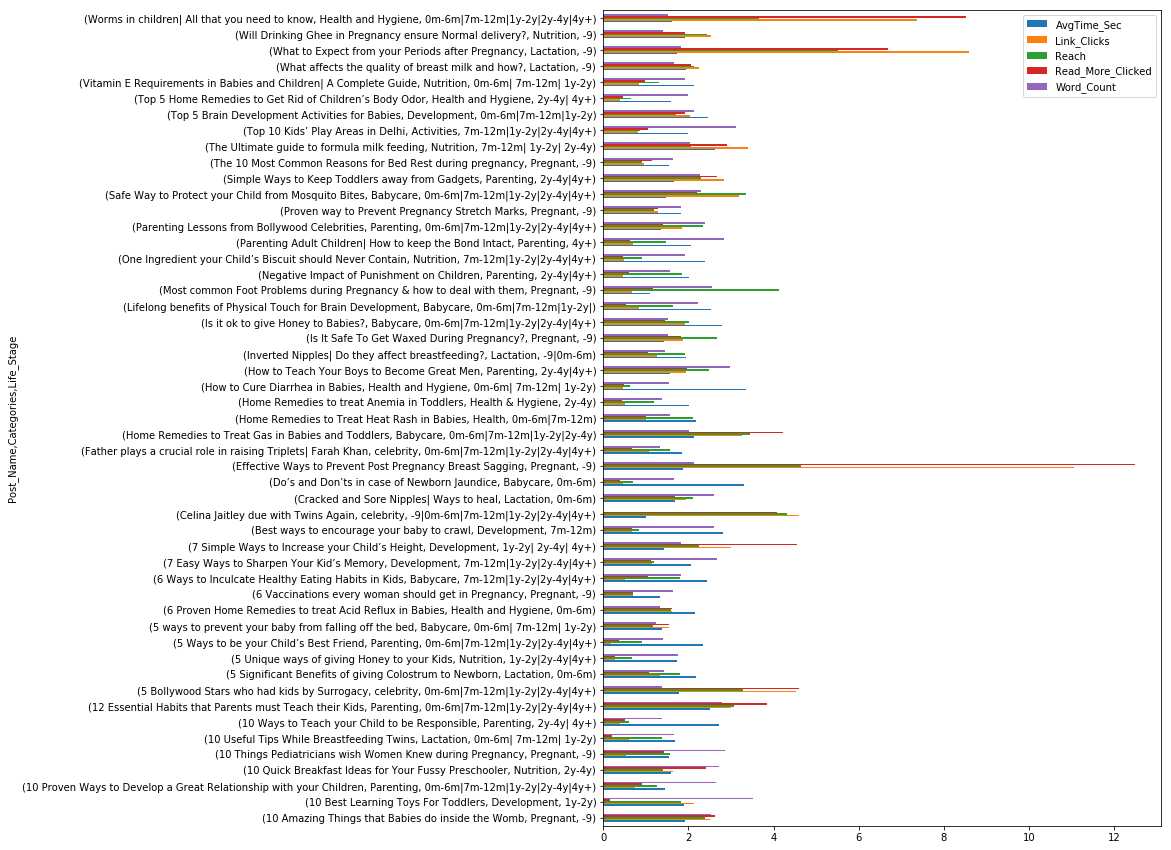

In [15]:
df2.plot(kind="barh",figsize=(10,15))

#### 5.6 Lets check the statistics of our dataframe which consist the pivot table

In [16]:
df2.describe() 

,AvgTime_Sec,Link_Clicks,Reach,Read_More_Clicked,Word_Count
count,51.000000,51.000000,51.000000,51.000000,51.000000
mean,1.960980,1.959804,1.960588,1.960392,1.961373
std,0.509342,2.110284,1.117632,2.239019,0.624958
min,1.010000,0.190000,0.600000,0.150000,0.000000
25%,1.590000,0.675000,1.195000,0.645000,1.525000
50%,1.920000,1.280000,1.800000,1.170000,1.830000
75%,2.170000,2.375000,2.365000,2.125000,2.460000
max,3.360000,11.050000,5.520000,12.480000,3.510000


#### 5.7 Lets plot the plot with regression line using seaborn. lets plot the graph with "Read_More_Clicked" on y axis and other parameters on x axis.

#### "Read_More_Clicked" Vs "Reach"

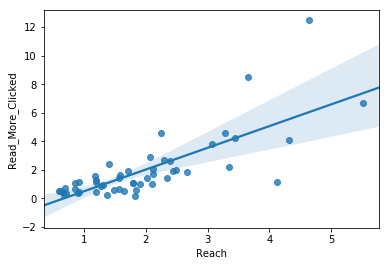

In [17]:
sns.regplot(x="Reach", y="Read_More_Clicked", data=df2)

#### "Read_More_Clicked" Vs "AvgTime_sec"

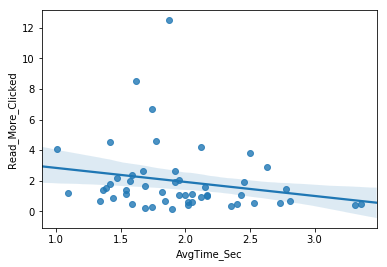

In [18]:
sns.regplot(x="AvgTime_Sec", y="Read_More_Clicked", data=df2)

#### "Read_More_Clicked" Vs "Link_clicked"

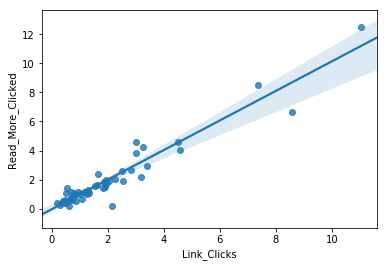

In [19]:
sns.regplot(x="Link_Clicks", y="Read_More_Clicked", data=df2)

#### "Read_More_Clicked" Vs "Word_count"

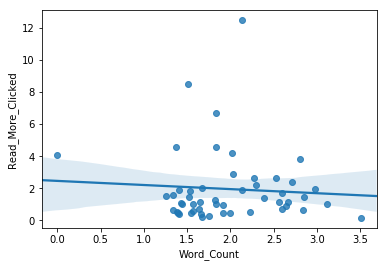

In [20]:
sns.regplot(x="Word_Count", y="Read_More_Clicked", data=df2)

#### 5.8 Lets check the correlation bewteen each parameter

In [21]:
df2.corr()

,AvgTime_Sec,Link_Clicks,Reach,Read_More_Clicked,Word_Count
AvgTime_Sec,1.000000,-0.210752,-0.371201,-0.208610,-0.018275
Link_Clicks,-0.210752,1.000000,0.816326,0.959029,-0.084194
Reach,-0.371201,0.816326,1.000000,0.760065,-0.064184
Read_More_Clicked,-0.208610,0.959029,0.760065,1.000000,-0.071598
Word_Count,-0.018275,-0.084194,-0.064184,-0.071598,1.000000


<a id="ref6"></a>

# 6. Comment on your findings.

Comparing the regression plot of "Word_Count","Link_Clicked","Avg time in sec" and "Reach" we see that the points for "Reach" and "link clicked" are much closer to the generated line and on the average increases. The points for "word count" and "Avg Time in sec" have more spread around the predicted line, and it is much harder to determine if the points are decreasing or increasing as the "read more clicked" increases.

Also, There is a Positive correlation between "Link_clicks" and "Reach" against "Read more click" which is <b>0.959 and 0.760 </b>respectively. So we can say that to improve the read more click counts we have to focus on the reach and link clicks numbers.

Comparing to the results of each parameter from our pivot table , We can say that 'Link_Clicks' has the highest value which is <b> 11.05% </b> on post name "Effective Ways to Prevent Post Pregnancy Breast Sagging" and categories "Pregnant" and,
"Reach" has the highest value which is <b> 5.52% </b> on post name "What to Expect from your Periods after Pregnancy" and categories "Lactation". These conclude that people are searching for more informations related to preganancy and lactation, so we can write or upload more blogs on pregnancy and lactation in order to increase the Reach and link clicks so that it will increase the chance to get mre read more clicks.

Some of the tips and tricks we can follow in order to increase the numbers of people visiting outr website so that we can increase the number of "reach" and "link clicks".

<ol>
<li> <b>Advertisement</b>- Advertisement on social media like facebook, Post blogs on Linkedin.
    
<li> <b>Marketing</b> - Marketing is really necessary for any business , like to increase sales, Bring in new customers, Get existing customers to stick to your website by introducing new services, to improve customer loyalty, for this we can Send Emails to the customers with the updated services or blogs.
    
<li> <b>Research the Competition</b> - Find out what people are reading (and talking about), and emulate that kind of content to bring traffic to your website.
    
<li> <b>Site is responsive and fast </b>-Ensure that the website is accessible and comfortably viewable across a range of devices, including smaller smartphones because today, people are using mobile devices to access the web.
    
<li> <b> Add Video</b>- Text-based content is all well and good, but video can be a valuable asset in both attracting new visitors and making the site more engaging.